In [1]:
from os import listdir
import pandas as pd
import csv
import glob

In [2]:
training_a = sorted(listdir('training_A/'))

training_b = sorted(listdir('training_B/'))

In [3]:
dummy = pd.read_csv('training_A/p000902.psv', sep ='|')
dummy.shape

(44, 41)

In [4]:
with open("sepsis_data.psv", "wb") as fout:
    
    for i, csv in enumerate(training_a):
        if i == 0:
            with open('training_A/' + csv, "rb") as f:
                fout.write(f.read())
      # now the rest:    
        with open('training_A/' + csv, "rb") as f:
            next(f) 
            fout.write(f.read())
      
    for i,csv in enumerate(training_b):
        if i <15000:
            with open('training_B/' + csv, "rb") as f:
                next(f)
                fout.write(f.read())

In [5]:
sepsis_data = pd.read_csv('sepsis_data.psv', sep ='|')

In [6]:
print(sepsis_data.head())

      HR  O2Sat  Temp    SBP    MAP  DBP  Resp  EtCO2  BaseExcess  HCO3  ...  \
0    NaN    NaN   NaN    NaN    NaN  NaN   NaN    NaN         NaN   NaN  ...   
1   97.0   95.0   NaN   98.0  75.33  NaN  19.0    NaN         NaN   NaN  ...   
2   89.0   99.0   NaN  122.0  86.00  NaN  22.0    NaN         NaN   NaN  ...   
3   90.0   95.0   NaN    NaN    NaN  NaN  30.0    NaN        24.0   NaN  ...   
4  103.0   88.5   NaN  122.0  91.33  NaN  24.5    NaN         NaN   NaN  ...   

   WBC  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  HospAdmTime  \
0  NaN         NaN        NaN  83.14       0    NaN    NaN        -0.03   
1  NaN         NaN        NaN  83.14       0    NaN    NaN        -0.03   
2  NaN         NaN        NaN  83.14       0    NaN    NaN        -0.03   
3  NaN         NaN        NaN  83.14       0    NaN    NaN        -0.03   
4  NaN         NaN        NaN  83.14       0    NaN    NaN        -0.03   

   ICULOS  SepsisLabel  
0       1            0  
1       2         

In [7]:
sepsis_data.shape

(1361672, 41)

In [8]:
with open("sepsis_data_test.psv", "wb") as fout:
    
    for i, csv in enumerate(training_b):
        if i >= 15000:
            if i == 15000:
                with open('training_B/' + csv, "rb") as f:
                    fout.write(f.read())   
            with open('training_B/' + csv, "rb") as f:
                next(f) 
                fout.write(f.read())

In [9]:
test = pd.read_csv('sepsis_data_test.psv', sep='|')

In [10]:
test.shape

(190615, 41)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
#from sklearn_pandas import CategoricalImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [13]:
import missingno as msno

In [14]:
sepsis_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [15]:
df = sepsis_data['SepsisLabel'].value_counts()

In [16]:
no_sepsis_percent = (df[0]/(df[0]+df[1]))*100
sepsis_percent = (df[1]/(df[0]+df[1]))*100

FileNotFoundError: [Errno 2] No such file or directory: 'Saved_Figures/percent_sepsis.png'

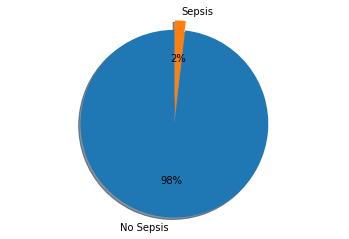

In [17]:
labels = 'No Sepsis', 'Sepsis'
sizes = [no_sepsis_percent, sepsis_percent]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.0f%%', shadow=True, startangle = 90)
ax1.axis('equal')



plt.savefig('Saved_Figures/percent_sepsis.png')
plt.show()

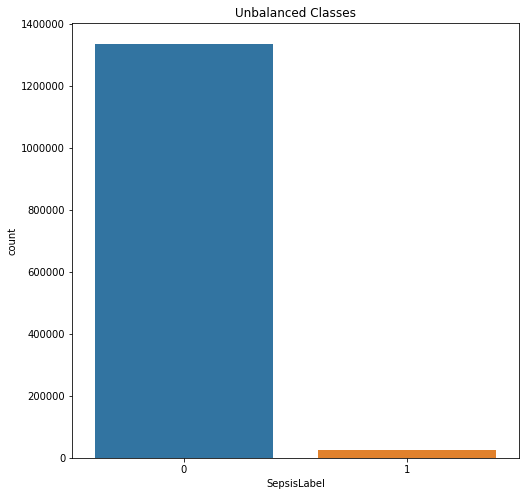

In [18]:
plt.figure(figsize=(8, 8))
sns.countplot('SepsisLabel', data=sepsis_data)
plt.title('Unbalanced Classes')
plt.show()

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import missingno as msno

In [20]:
training_data = pd.read_csv('sepsis_data.psv', sep ='|')

In [21]:
training_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [22]:
df = training_data['SepsisLabel'].value_counts()
df

0    1336657
1      25015
Name: SepsisLabel, dtype: int64

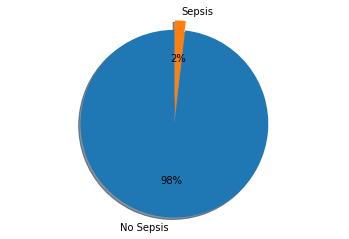

In [23]:
no_sepsis_percent = (df[0]/(df[0]+df[1]))*100
sepsis_percent = (df[1]/(df[0]+df[1]))*100
#fig = plt.figure(figsize=(5,5))
labels = 'No Sepsis', 'Sepsis'
sizes = [no_sepsis_percent, sepsis_percent]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.0f%%', shadow=True, startangle = 90)
ax1.axis('equal')



#plt.savefig('Saved_Figures/percent_sepsis.png')
plt.show()

In [24]:
# Sum of all missing values in dataset
missing_data = training_data.isnull().sum()
missing_data

HR                   130133
O2Sat                175676
Temp                 902590
SBP                  199680
MAP                  165134
DBP                  459960
Resp                 198043
EtCO2               1319201
BaseExcess          1277998
HCO3                1297001
FiO2                1236770
pH                  1258514
PaCO2               1279813
SaO2                1311871
AST                 1339842
BUN                 1265550
Alkalinephos        1340093
Calcium             1283397
Chloride            1292412
Creatinine          1277512
Bilirubin_direct    1359132
Glucose             1138773
Lactate             1323998
Magnesium           1272850
Phosphate           1304990
Potassium           1231945
Bilirubin_total     1341905
TroponinI           1350388
Hct                 1235350
Hgb                 1258251
PTT                 1317887
WBC                 1272210
Fibrinogen          1352505
Platelets           1279609
Age                       0
Gender              

In [25]:
# percentage of missingness
missing_percent = (missing_data/training_data.shape[0])*100
missing_percent

HR                   9.556854
O2Sat               12.901492
Temp                66.285420
SBP                 14.664324
MAP                 12.127296
DBP                 33.779060
Resp                14.544105
EtCO2               96.880967
BaseExcess          93.855055
HCO3                95.250618
FiO2                90.827306
pH                  92.424167
PaCO2               93.988347
SaO2                96.342658
AST                 98.396824
BUN                 92.940884
Alkalinephos        98.415257
Calcium             94.251553
Chloride            94.913606
Creatinine          93.819363
Bilirubin_direct    99.813465
Glucose             83.630493
Lactate             97.233254
Magnesium           93.476990
Phosphate           95.837324
Potassium           90.472963
Bilirubin_total     98.548329
TroponinI           99.171313
Hct                 90.723023
Hgb                 92.404852
PTT                 96.784468
WBC                 93.429989
Fibrinogen          99.326784
Platelets 

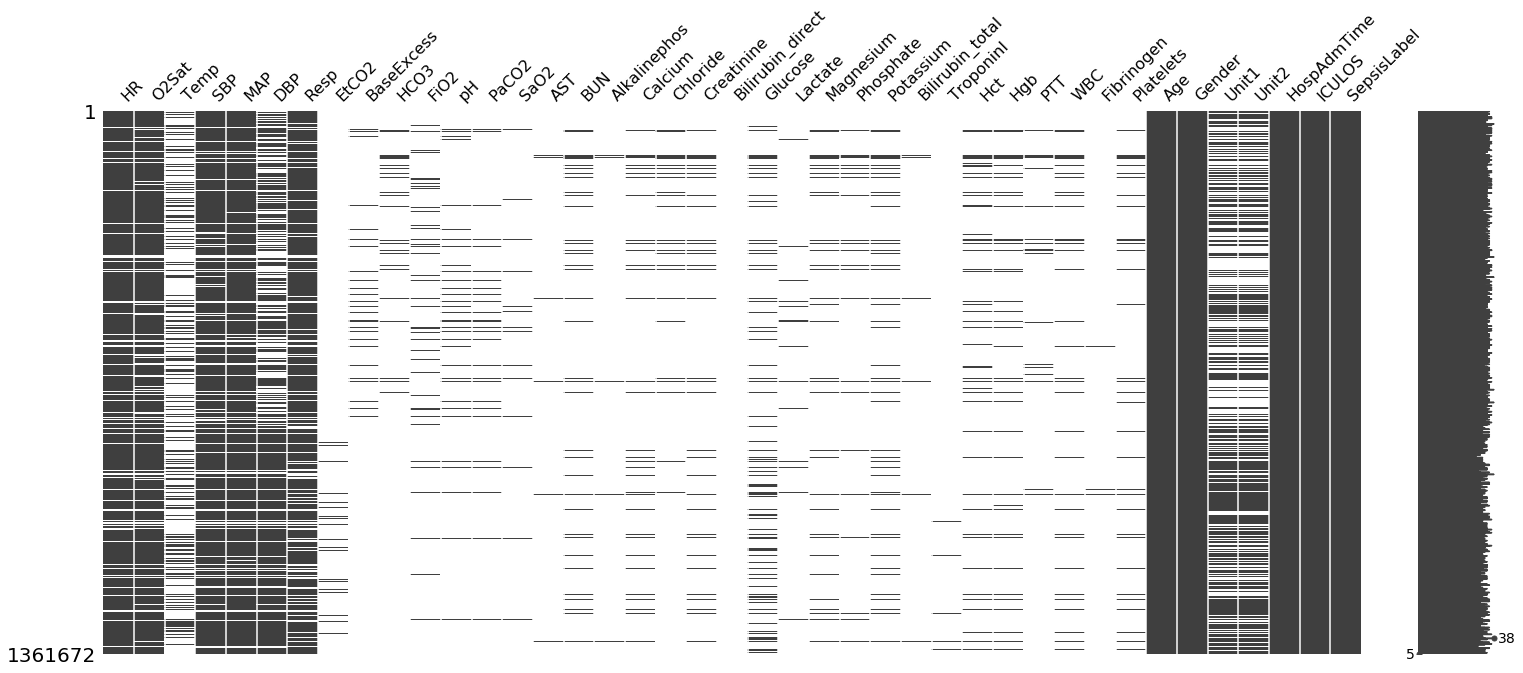

In [26]:
msno.matrix(training_data)

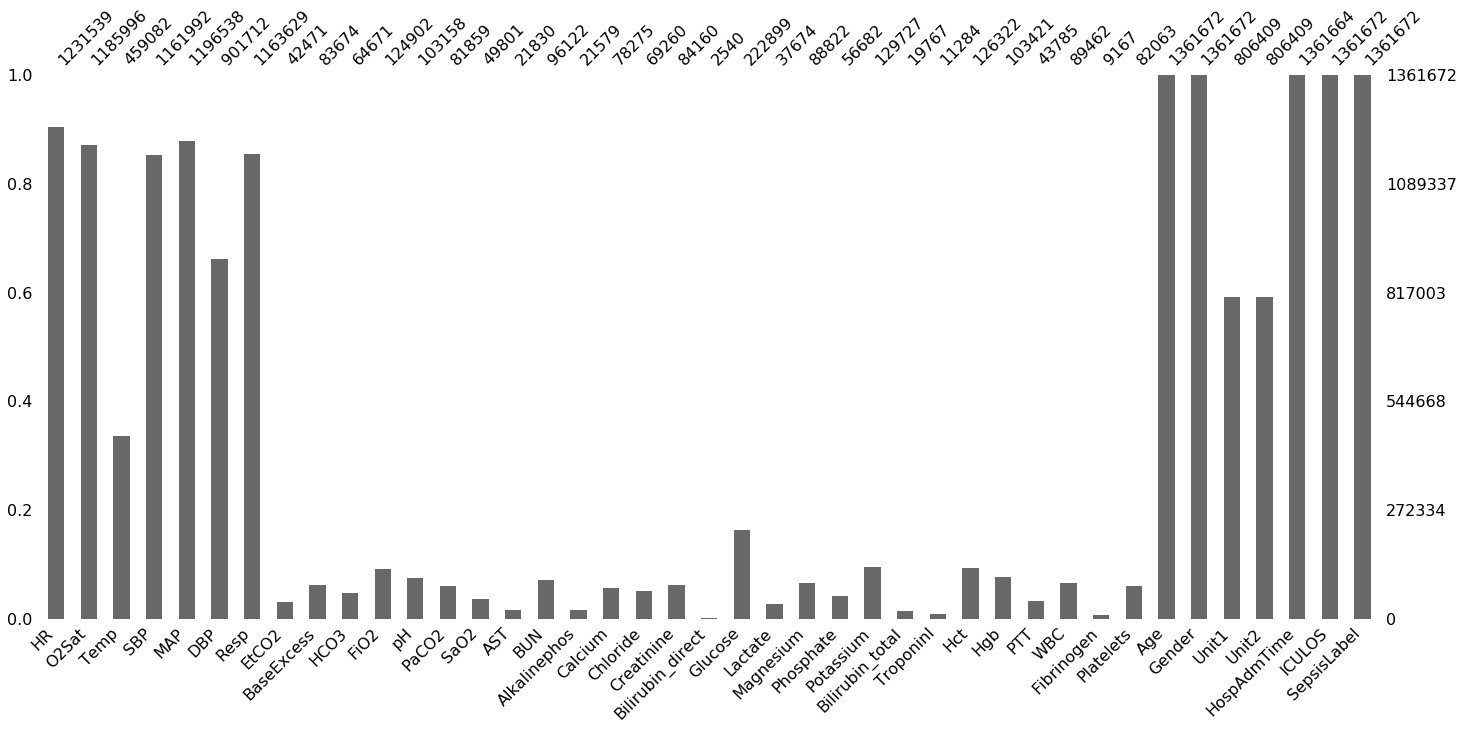

In [27]:
msno.bar(training_data)

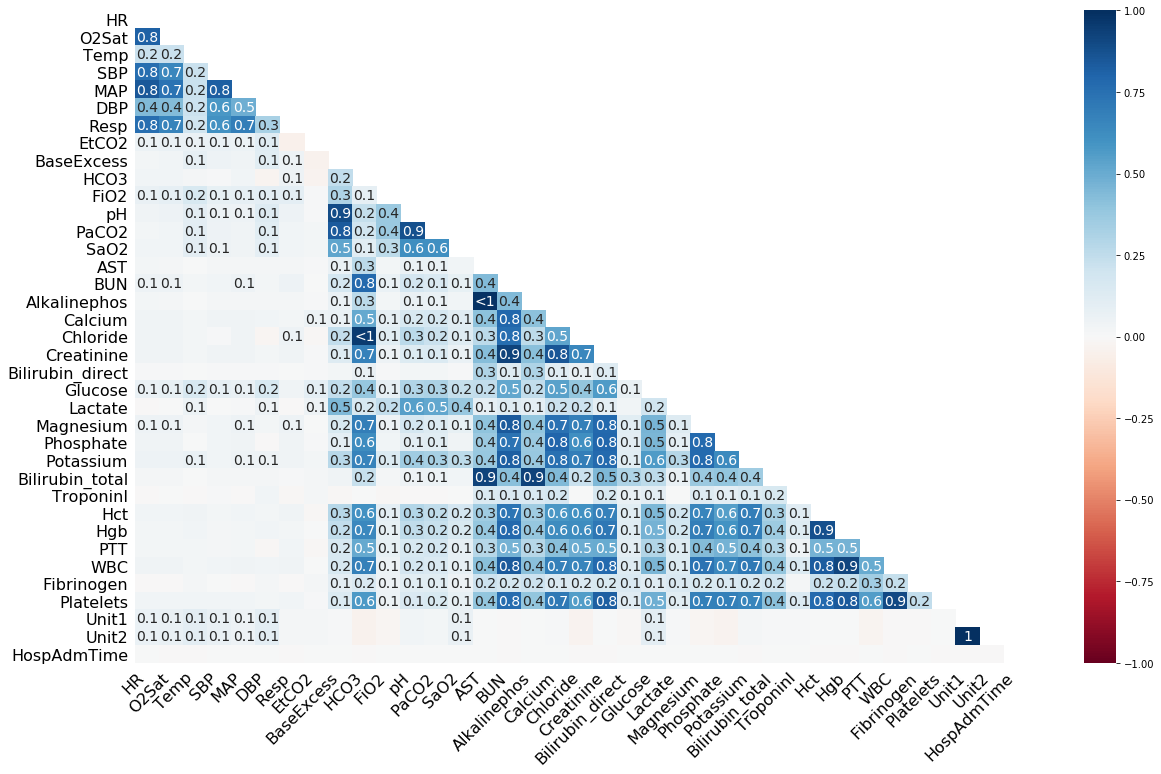

In [28]:
msno.heatmap(training_data)

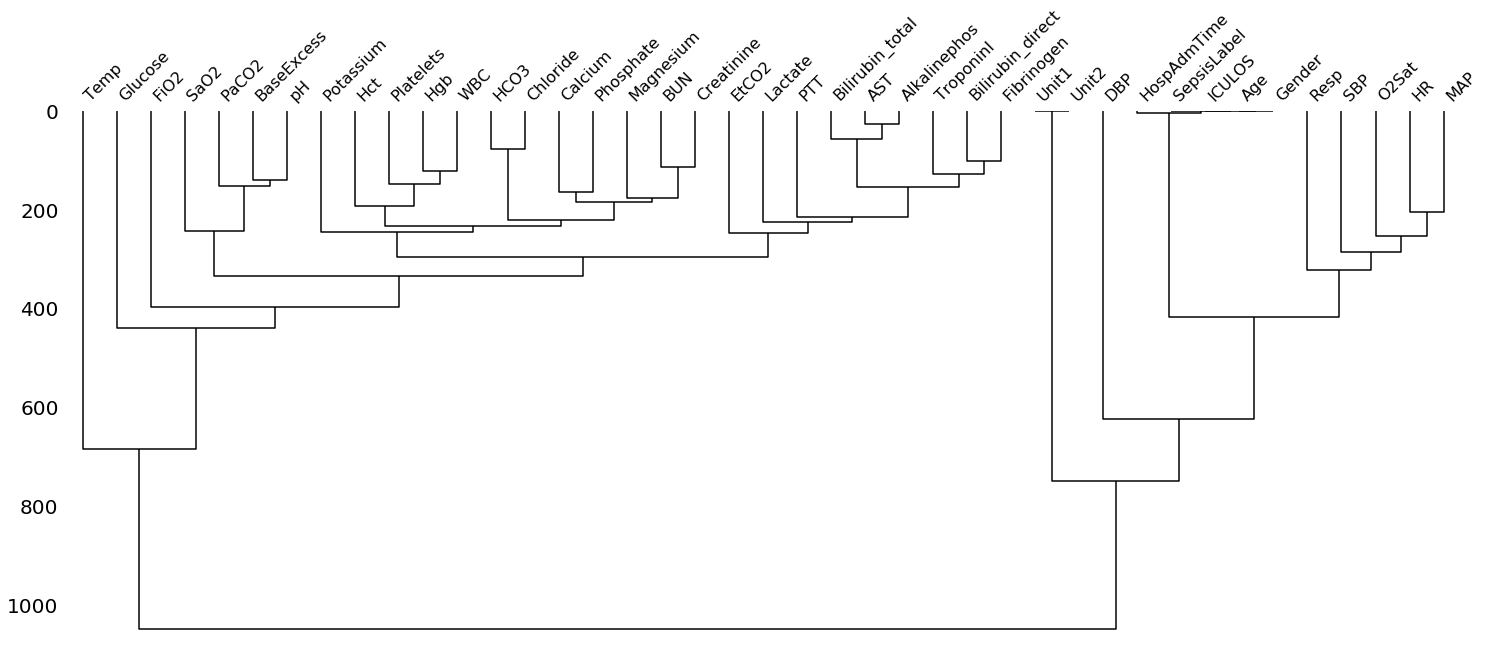

In [29]:
msno.dendrogram(training_data)

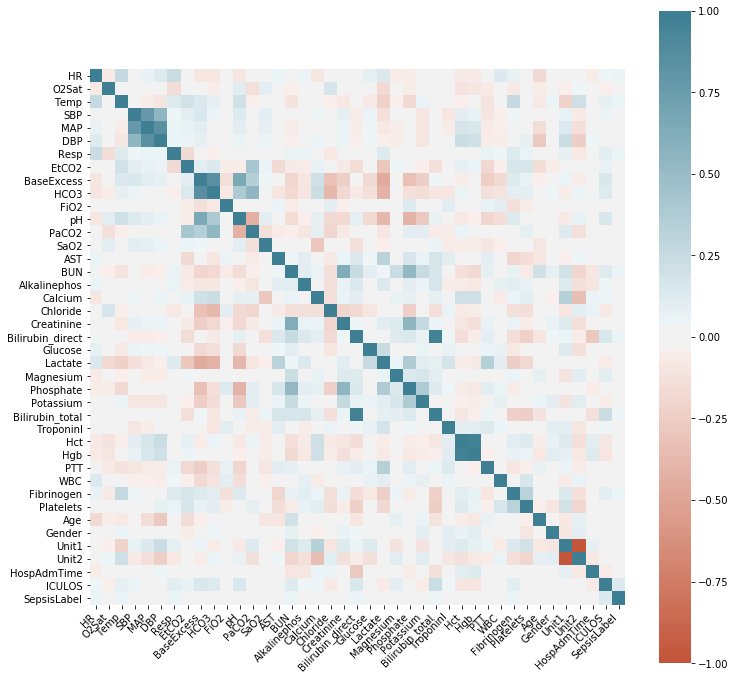

In [30]:
fig = plt.figure(figsize=(12,12))
corr = training_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

C:\anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


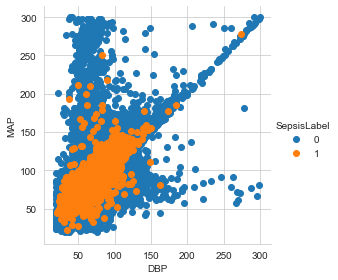

In [31]:
sns.set_style('whitegrid')
sns.FacetGrid(training_data, hue='SepsisLabel', size=4) \
 .map(plt.scatter, 'DBP', 'MAP') \
 .add_legend();
plt.show();

In [32]:
new_cols = list(missing_percent[missing_percent < 92].index)

In [33]:
sepsis_data = training_data[new_cols]

In [34]:
new_missing_data = sepsis_data.isnull().sum()
new_missing_percent = (new_missing_data/sepsis_data.shape[0])*100
new_missing_percent

HR              9.556854
O2Sat          12.901492
Temp           66.285420
SBP            14.664324
MAP            12.127296
DBP            33.779060
Resp           14.544105
FiO2           90.827306
Glucose        83.630493
Potassium      90.472963
Hct            90.723023
Age             0.000000
Gender          0.000000
Unit1          40.778029
Unit2          40.778029
HospAdmTime     0.000588
ICULOS          0.000000
SepsisLabel     0.000000
dtype: float64

In [35]:
new_df = sepsis_data['SepsisLabel'].value_counts()
new_df

0    1336657
1      25015
Name: SepsisLabel, dtype: int64

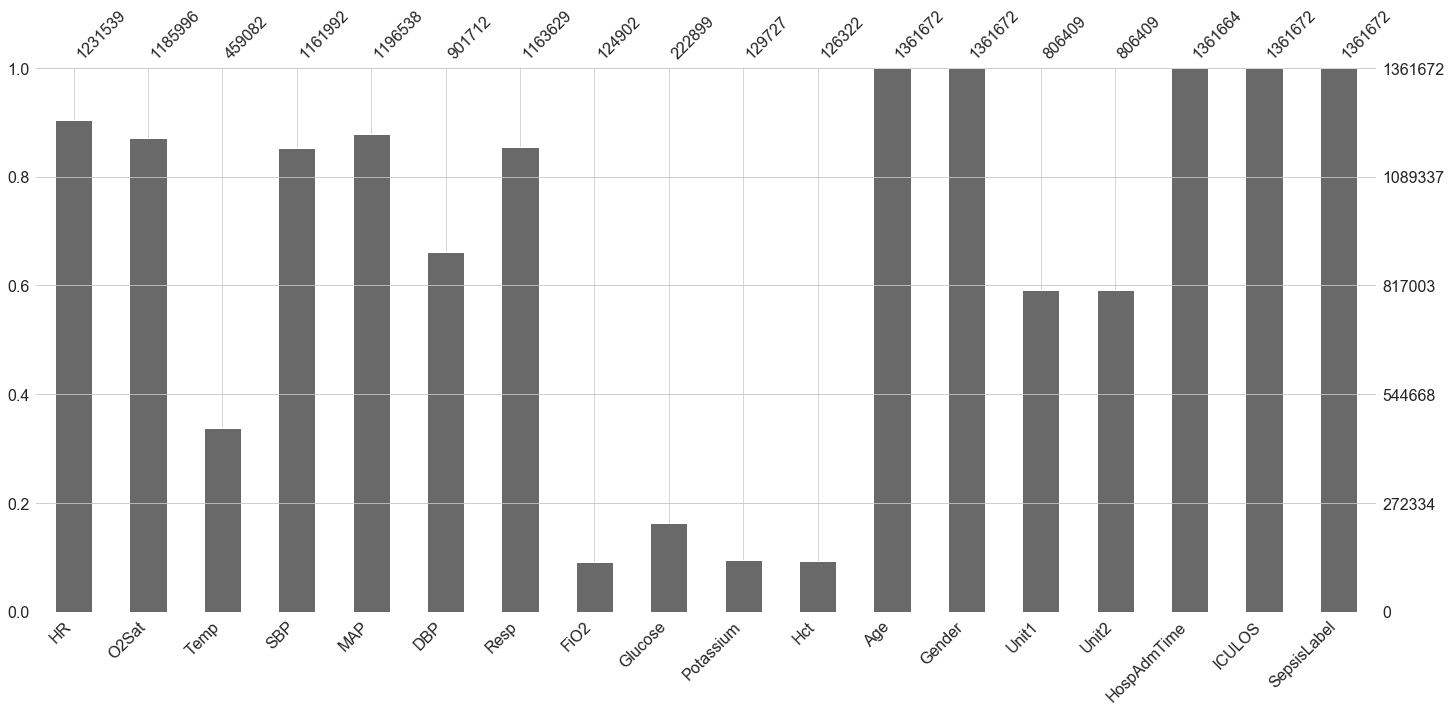

In [36]:
msno.bar(sepsis_data)

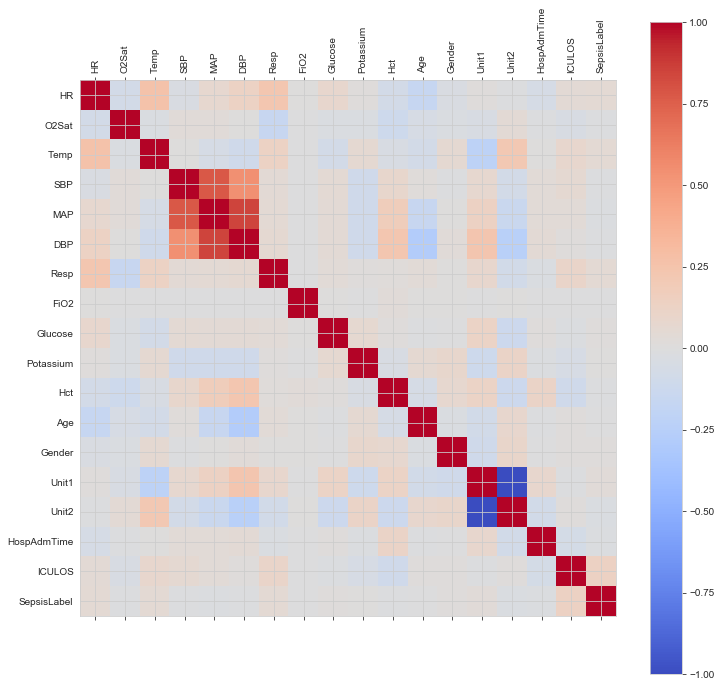

In [37]:
corr = sepsis_data.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(sepsis_data.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(sepsis_data.columns)
ax.set_yticklabels(sepsis_data.columns)

#plt.savefig('Saved_Figures/correlation.png')
plt.show()

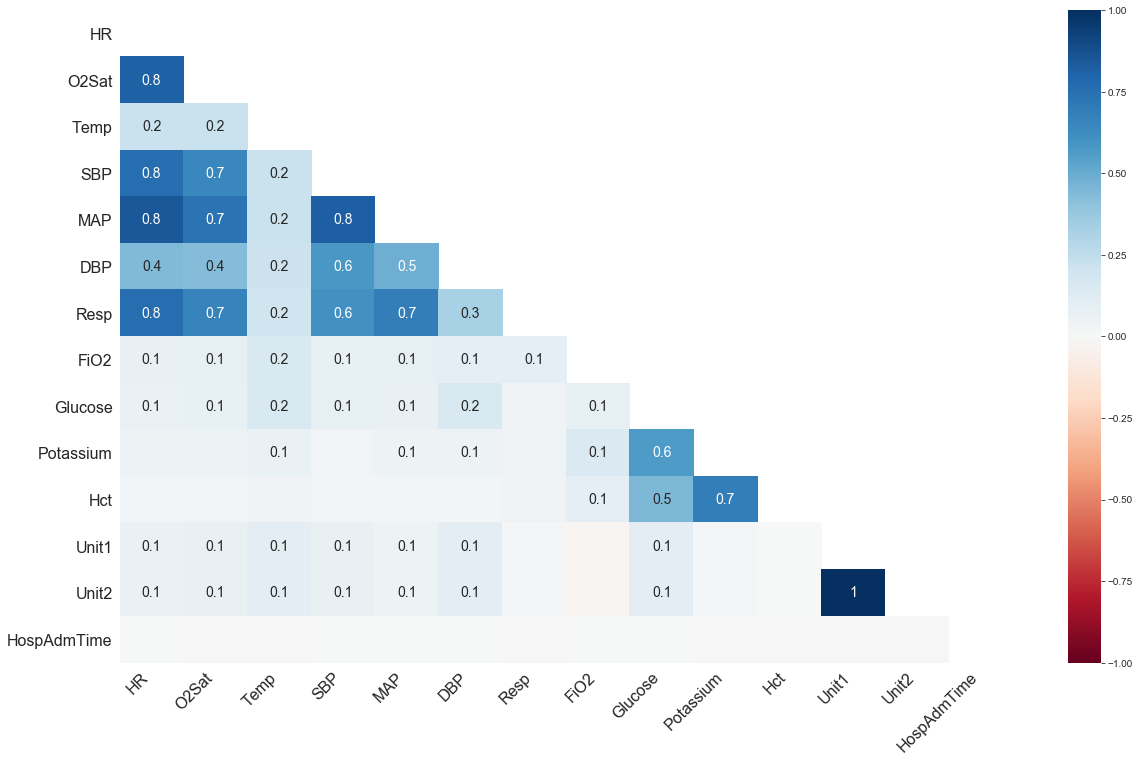

In [38]:
msno.heatmap(sepsis_data)

In [39]:
sepsis_data.describe(include = 'all')

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,1.231539e+06,1.185996e+06,459082.000000,1.161992e+06,1.196538e+06,901712.000000,1.163629e+06,124902.000000,222899.000000,129727.000000,126322.000000,1.361672e+06,1.361672e+06,806409.000000,806409.000000,1.361664e+06,1.361672e+06,1.361672e+06
mean,8.463807e+01,9.720677e+01,36.981409,1.233876e+02,8.187102e+01,63.398324,1.873328e+01,0.555864,136.638112,4.139130,30.767546,6.215126e+01,5.624284e-01,0.498618,0.501382,-5.522790e+01,2.707650e+01,1.837080e-02
std,1.728354e+01,2.941111e+00,0.770547,2.302735e+01,1.620716e+01,13.853230,5.149755e+00,11.320101,51.442553,0.639772,5.381143,1.635856e+01,4.960876e-01,0.499998,0.499998,1.634700e+02,2.913055e+01,1.342882e-01
min,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,20.000000,1.000000e+00,-50.000000,10.000000,1.000000,5.500000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00
25%,7.200000e+01,9.600000e+01,36.500000,1.065000e+02,7.050000e+01,54.000000,1.500000e+01,0.400000,106.000000,3.700000,27.100000,5.200000e+01,0.000000e+00,0.000000,0.000000,-4.489000e+01,1.100000e+01,0.000000e+00
50%,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,62.000000,1.800000e+01,0.500000,126.000000,4.100000,30.250000,6.400000e+01,1.000000e+00,0.000000,1.000000,-5.500000e+00,2.100000e+01,0.000000e+00
75%,9.600000e+01,9.950000e+01,37.500000,1.380000e+02,9.100000e+01,71.000000,2.200000e+01,0.600000,153.000000,4.400000,34.000000,7.434000e+01,1.000000e+00,1.000000,1.000000,-3.000000e-02,3.400000e+01,0.000000e+00
max,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,300.000000,1.000000e+02,4000.000000,988.000000,27.500000,71.700000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00


In [40]:
demo_data = sepsis_data.dtypes == object

#demo_data['Age'] = True
demo_data['Unit1'] = True
demo_data['Unit2'] = True
demo_data['Gender'] = True
#demo_data['ICULOS'] = True

demo_data

HR             False
O2Sat          False
Temp           False
SBP            False
MAP            False
DBP            False
Resp           False
FiO2           False
Glucose        False
Potassium      False
Hct            False
Age            False
Gender          True
Unit1           True
Unit2           True
HospAdmTime    False
ICULOS         False
SepsisLabel    False
dtype: bool

In [41]:
demo_list = list(demo_data[demo_data].index)

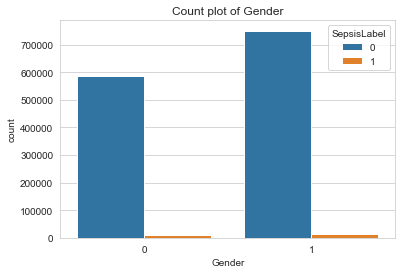

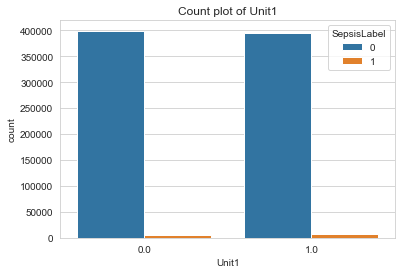

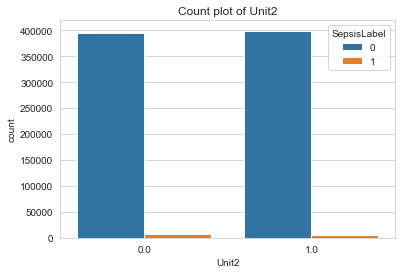

In [42]:
for i,var in enumerate(demo_list):
    plt.figure(i)
    plt.title("Count plot of " + str(var))
    sns.countplot(sepsis_data[var].dropna(), hue='SepsisLabel', data= sepsis_data);

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import missingno as msno
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
from sklearn.metrics import precision_score, classification_report,average_precision_score, accuracy_score, balanced_accuracy_score, precision_recall_curve, f1_score, auc, roc_curve

In [45]:
original_data = pd.read_csv('sepsis_data.psv', sep ='|')

In [46]:
original_data.shape

(1361672, 41)

In [47]:
import pandas as pd
# dropping NA values and removing missing values over 92+ %
training_data = pd.read_csv('fe_train.csv')

In [48]:
training_data.shape

(1361664, 12)

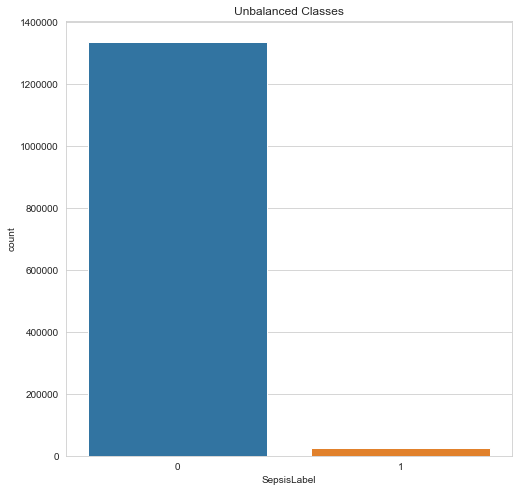

In [49]:
plt.figure(figsize=(8, 8))
sns.countplot('SepsisLabel', data=training_data)
plt.title('Unbalanced Classes')
plt.show()

In [50]:
testing_data = pd.read_csv('fe_test.csv')

In [51]:
testing_data.shape

(190615, 12)

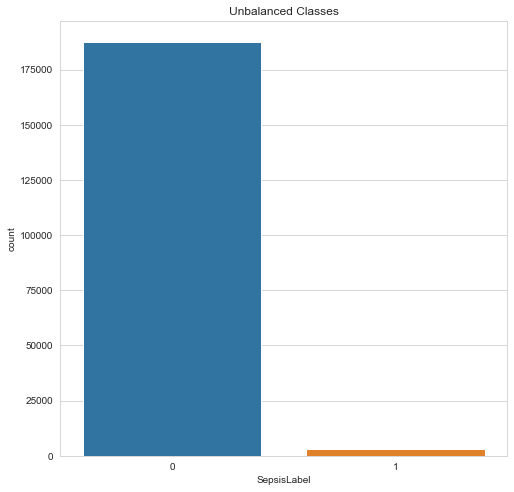

In [52]:
plt.figure(figsize=(8, 8))
sns.countplot('SepsisLabel', data=testing_data)
plt.title('Unbalanced Classes')
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()

In [55]:
# Encode training data
for col in training_data.columns.values:
    # Encoding only categorical variables
    if training_data[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=training_data[col]
        le.fit(data.values)
        training_data[col]=le.transform(training_data[col])

In [56]:
training_data.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS,SepsisLabel
0,0,1,1,0,0,1,0,0,0,-0.03,1,0
1,0,1,2,0,0,2,2,0,0,-0.03,2,0
2,0,1,2,0,0,0,2,0,0,-0.03,3,0
3,0,1,2,0,0,0,0,0,0,-0.03,4,0
4,0,1,0,0,0,0,2,2,1,-0.03,5,0


In [57]:
# Encode training data
for col in testing_data.columns.values:
    # Encoding only categorical variables
    if testing_data[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=testing_data[col]
        le.fit(data.values)
        testing_data[col]=le.transform(testing_data[col])

In [58]:
testing_data.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS,SepsisLabel
0,1,1,1,0,0,1,0,0,0,-43.69,1,0
1,1,1,2,0,0,1,1,0,0,-43.69,2,0
2,1,1,2,2,0,1,1,0,0,-43.69,3,0
3,1,1,2,0,0,1,1,0,0,-43.69,4,0
4,1,1,2,2,0,1,2,0,0,-43.69,5,0


In [59]:
cols = ['Gender', 'new_age', 'new_o2sat', 'new_temp', 'new_bp', 'new_resp', 'new_map', 'new_fio2', 'new_hr', 'HospAdmTime', 'ICULOS']

X_train = training_data[cols]
y_train = training_data['SepsisLabel']

In [60]:
X_test = testing_data[cols]
y_test = testing_data['SepsisLabel']

In [72]:
#Create an object of the classifier.

bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

In [73]:
# Train the classifier

bbc.fit(X_train, y_train)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
             random_state=0, ratio=None, replacement=False,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [74]:
# predict class values
dt_pred = bbc.predict(X_test)
dt_pred.sum()

20866

In [75]:
y_test

0         0
1         0
2         0
3         0
4         0
         ..
190610    0
190611    0
190612    0
190613    0
190614    0
Name: SepsisLabel, Length: 190615, dtype: int64

In [76]:
#Training with a XGB Classifer

In [77]:
from xgboost import XGBClassifier

In [78]:
xgb_model = XGBClassifier(learning_rate=0.10, n_estimators=500, max=5)

In [79]:
xgb_model.fit(X_train, y_train)

[12:33:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { max } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.1, max=5, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=500, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [80]:
pred_xgb = xgb_model.predict(X_test)

In [81]:
predictions = [round(value) for value in pred_xgb]

accuracy = balanced_accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 51.20%


In [82]:
### Training with balanced bagging classifer

bbc_xgb = BalancedBaggingClassifier(base_estimator=XGBClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

In [83]:
bbc_xgb.fit(X_train, y_train)

BalancedBaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_ch..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
             bootstrap=True, bootstrap_features=False, max_features=1.0,
             max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
             random_state=0, ratio=None, replacement=False,
             sampling_strategy='auto', verbose=0, warm_start=False)

In [84]:
preds_xgb = bbc.predict(X_test)


In [85]:
accuracy_score(y_test, preds_xgb)
#accuracy_score(y_train,preds_xgb)

0.887432783359127

In [86]:
# Predict probabilities
xgb_prob = bbc_xgb.predict_proba(X_test)
xgb_prob

array([[0.61630591, 0.38369409],
       [0.58306313, 0.41693688],
       [0.65507661, 0.3449234 ],
       ...,
       [0.8415417 , 0.15845831],
       [0.83098141, 0.1690186 ],
       [0.81682845, 0.18317155]])

In [87]:
# keep probabilities for the positive outcome only
xgb_prob = xgb_prob[:, 1]

In [88]:
# Get precision, recall values
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, preds_xgb)
xgb_f1, xgb_auc = f1_score(y_test, preds_xgb), auc(xgb_recall, xgb_precision)

In [89]:
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))

Logistic: f1=0.097 auc=0.231


In [90]:
fpr, tpr, _ = roc_curve(y_test, preds_xgb)

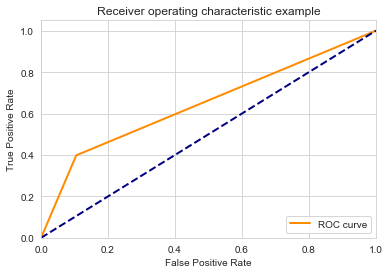

In [91]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #center line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

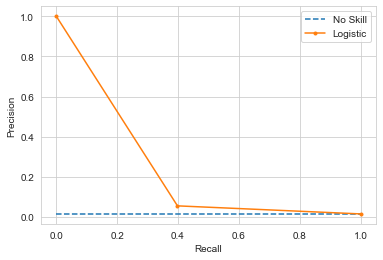

In [92]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(xgb_recall, xgb_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [93]:
average_precision = average_precision_score(y_test, pred_xgb)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.02


In [94]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import precision_score, accuracy_score, recall_score, \
average_precision_score, precision_recall_curve, confusion_matrix
import seaborn as sns
from subprocess import call
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

In [96]:
original_data = pd.read_csv('sepsis_data.psv', sep ='|')
missing_data = original_data.isnull().sum()
missing_percent = (missing_data/original_data.shape[0])*100
refined_columns = list(missing_percent[missing_percent < 92].index)
sepsis_data = original_data[refined_columns]

In [97]:
refined_columns

['HR',
 'O2Sat',
 'Temp',
 'SBP',
 'MAP',
 'DBP',
 'Resp',
 'FiO2',
 'Glucose',
 'Potassium',
 'Hct',
 'Age',
 'Gender',
 'Unit1',
 'Unit2',
 'HospAdmTime',
 'ICULOS',
 'SepsisLabel']

In [98]:
sepsis_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,0.28,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0


In [99]:
sepsis_data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Potassium,Hct,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,1.231539e+06,1.185996e+06,459082.000000,1.161992e+06,1.196538e+06,901712.000000,1.163629e+06,124902.000000,222899.000000,129727.000000,126322.000000,1.361672e+06,1.361672e+06,806409.000000,806409.000000,1.361664e+06,1.361672e+06,1.361672e+06
mean,8.463807e+01,9.720677e+01,36.981409,1.233876e+02,8.187102e+01,63.398324,1.873328e+01,0.555864,136.638112,4.139130,30.767546,6.215126e+01,5.624284e-01,0.498618,0.501382,-5.522790e+01,2.707650e+01,1.837080e-02
std,1.728354e+01,2.941111e+00,0.770547,2.302735e+01,1.620716e+01,13.853230,5.149755e+00,11.320101,51.442553,0.639772,5.381143,1.635856e+01,4.960876e-01,0.499998,0.499998,1.634700e+02,2.913055e+01,1.342882e-01
min,2.000000e+01,2.000000e+01,20.900000,2.000000e+01,2.000000e+01,20.000000,1.000000e+00,-50.000000,10.000000,1.000000,5.500000,1.400000e+01,0.000000e+00,0.000000,0.000000,-5.366860e+03,1.000000e+00,0.000000e+00
25%,7.200000e+01,9.600000e+01,36.500000,1.065000e+02,7.050000e+01,54.000000,1.500000e+01,0.400000,106.000000,3.700000,27.100000,5.200000e+01,0.000000e+00,0.000000,0.000000,-4.489000e+01,1.100000e+01,0.000000e+00
50%,8.350000e+01,9.800000e+01,37.000000,1.210000e+02,8.000000e+01,62.000000,1.800000e+01,0.500000,126.000000,4.100000,30.250000,6.400000e+01,1.000000e+00,0.000000,1.000000,-5.500000e+00,2.100000e+01,0.000000e+00
75%,9.600000e+01,9.950000e+01,37.500000,1.380000e+02,9.100000e+01,71.000000,2.200000e+01,0.600000,153.000000,4.400000,34.000000,7.434000e+01,1.000000e+00,1.000000,1.000000,-3.000000e-02,3.400000e+01,0.000000e+00
max,2.800000e+02,1.000000e+02,50.000000,3.000000e+02,3.000000e+02,300.000000,1.000000e+02,4000.000000,988.000000,27.500000,71.700000,1.000000e+02,1.000000e+00,1.000000,1.000000,2.399000e+01,3.360000e+02,1.000000e+00


In [100]:
sepsis_data.isnull().sum()
sepsis_data = sepsis_data.dropna(subset=['HospAdmTime'])

In [101]:
sepsis_data['O2Sat'].min()

20.0

In [102]:
sepsis_data['Age'].min()

14.0

In [103]:
sepsis_data_test = pd.read_csv('sepsis_data_test.psv', sep='|')

In [104]:
sepsis_data_test.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
count,167343.000000,163544.000000,66161.000000,164017.000000,162466.000000,163966.000000,150313.000000,15165.000000,478.000000,359.000000,...,9988.000000,1075.000000,10149.000000,190615.000000,190615.000000,133841.000000,133841.000000,190615.000000,190615.000000,190615.000000
mean,84.166628,97.099233,36.948108,126.324189,86.299441,66.208423,18.675607,33.113848,-2.303556,23.903900,...,10.836399,284.346512,189.602572,61.004008,0.536595,0.484239,0.515761,-62.517086,26.411096,0.015219
std,17.625333,2.906194,0.765649,24.475479,16.795645,14.275852,4.680407,7.782494,4.336779,3.171466,...,9.168976,138.763003,95.043849,16.548700,0.498660,0.499753,0.499753,153.128765,28.084256,0.122424
min,21.000000,20.000000,30.400000,22.000000,30.000000,20.000000,1.000000,10.000000,-18.250000,12.600000,...,0.100000,35.000000,1.000000,14.000000,0.000000,0.000000,0.000000,-3397.640000,1.000000,0.000000
25%,71.500000,96.000000,36.500000,108.000000,74.000000,56.000000,16.000000,29.000000,-4.400000,22.000000,...,7.100000,187.000000,126.000000,50.000000,0.000000,0.000000,0.000000,-66.670000,10.000000,0.000000
50%,83.000000,98.000000,36.900000,124.000000,84.000000,64.000000,18.000000,33.500000,-1.975000,23.800000,...,9.600000,260.000000,178.000000,62.000000,1.000000,0.000000,1.000000,-9.430000,20.000000,0.000000
75%,95.000000,99.000000,37.400000,142.000000,96.000000,74.000000,21.000000,38.000000,0.300000,25.550000,...,12.900000,348.000000,237.000000,73.000000,1.000000,1.000000,1.000000,-3.230000,34.000000,0.000000
max,191.000000,100.000000,41.800000,296.000000,300.000000,296.000000,99.000000,100.000000,11.100000,36.400000,...,387.000000,1000.000000,1140.000000,100.000000,1.000000,1.000000,1.000000,0.000000,336.000000,1.000000


In [105]:
def fe_new_age(data):
    data.loc[data['Age'] >=60, 'new_age'] = 'old'
    data.loc[data['Age'] <10, 'new_age'] = 'infant'
    data.loc[(data['Age'] >=10) & (data['Age'] <60), 
            'new_age'] = 'adult'
    return data

In [106]:
sepsis_data = fe_new_age(sepsis_data)

In [107]:
sepsis_data_test = fe_new_age(sepsis_data_test)

In [108]:
sepsis_data['new_age'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1361667    False
1361668    False
1361669    False
1361670    False
1361671    False
Name: new_age, Length: 1361664, dtype: bool

In [109]:
def fe_new_hr(data):
    data.loc[(data['HR'] >= 70) & (data['HR'] < 110 ) & (data['Age'] < 10), 'new_hr'] = 'normal'
    data.loc[(data['HR'] > 60) & (data['HR'] < 100) & data['Age'] >= 10, 'new_hr'] = 'normal'
    data.loc[((data['HR'] < 70) | (data['Age'] >= 110)) & (data['Age']<10), 'new_hr'] = 'abnormal'
    data.loc[(data['HR'] >= 100) & (data['Age'] >= 10), 'new_hr'] = 'abnormal'
    data['new_hr'].fillna('Missing', inplace=True)
    return data

In [110]:
sepsis_data = fe_new_hr(sepsis_data)
sepsis_data_test = fe_new_hr(sepsis_data_test)

In [111]:
def fe_new_o2sat(data):
    data.loc[(data['O2Sat'] >= 95) & (data['O2Sat'] < 100), 'new_o2sat'] = 'normal'
    data.loc[(data['O2Sat'] < 95) & (data['O2Sat'] >= 0), 'new_o2sat'] = 'abnormal'
    data['new_o2sat'].fillna('missing', inplace=True)
    return data

In [112]:
sepsis_data = fe_new_o2sat(sepsis_data)
sepsis_data_test = fe_new_o2sat(sepsis_data_test)

In [113]:
def fe_new_temp(data):
    data.loc[(data['Temp'] >= 36) & (data['Temp'] < 38),'new_temp'] = 'normal'
    data.loc[(data['Temp'] < 36) | (data['Temp'] >= 38),'new_temp'] = 'abnormal'
    data['new_temp'].fillna('Missing', inplace=True)
    return data

In [114]:
sepsis_data = fe_new_temp(sepsis_data)
sepsis_data_test = fe_new_temp(sepsis_data_test)

In [116]:
def fe_new_bp(data):
    data.loc[(data['SBP'] < 90) & (data['DBP'] < 60), 'new_bp'] = 'low'
    data.loc[(data['SBP'].between(90,120, inclusive=True)) & (data['DBP'].between(60,80, inclusive=True)), 'new_bp'] = 'normal'
    data.loc[(data['SBP'].between(120,140, inclusive=True)) & (data['DBP'].between(80,90, inclusive=True)),'new_bp'] = 'elevated'
    data.loc[(data['SBP'] > 140 ) & (data['DBP'] > 90 ), 'new_bp'] = 'high'
    data['new_bp'].fillna('Missing', inplace=True)
    return data

In [117]:
sepsis_data = fe_new_bp(sepsis_data)
sepsis_data_test = fe_new_bp(sepsis_data_test)

In [118]:
def fe_new_resp(data):
    data.loc[(data['Resp'].between(30, 60)) & (data['Age'] < 1), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(24, 40)) & (data['Age'].between(1, 3)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(22, 34)) & (data['Age'].between(3, 6)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(18, 30)) & (data['Age'].between(6, 12)), 'new_resp'] = 'normal'
    data.loc[(data['Resp'].between(12, 16)) & (data['Age'].between(12, 18)), 'new_resp'] = 'normal'  
    data.loc[(data['Resp'].between(12, 20)) & (data['Age'] > 18), 'new_resp'] = 'normal'  
    
    data.loc[((data['Resp'] < 30) | (data['Resp'] > 60)) & (data['Age'] <1) ,'new_resp'] = 'abnormal'   
    data.loc[((data['Resp'] < 24) | (data['Resp'] > 40)) & (data['Age'].between(1, 3)) ,'new_resp'] = 'abnormal'   
    data.loc[((data['Resp'] < 22) | (data['Resp'] > 34)) & (data['Age'].between(3, 6)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 18) | (data['Resp'] > 30)) & (data['Age'].between(6, 12)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 12) | (data['Resp'] > 16)) & (data['Age'].between(12, 18)) ,'new_resp'] = 'abnormal'
    data.loc[((data['Resp'] < 12) | (data['Resp'] > 20)) & (data['Age'] > 18) ,'new_resp'] = 'abnormal'
    
    
    data['new_resp'].fillna('missing', inplace = True)
                                                            
    return data

In [119]:
sepsis_data = fe_new_resp(sepsis_data)
sepsis_data_test = fe_new_resp(sepsis_data_test)

In [120]:
def fe_new_map(data):
    data.loc[(data['MAP'] >= 70) & (data['MAP'] < 100),'new_map'] = 'normal'
    data.loc[(data['MAP'] < 70) | (data['MAP'] >= 100),'new_map'] = 'abnormal'
    data['new_map'].fillna('Missing', inplace=True)
    return data

In [121]:
sepsis_data = fe_new_map(sepsis_data)
sepsis_data_test = fe_new_map(sepsis_data_test)

In [122]:
def fe_new_fio2(data):
    data.loc[(data['FiO2'] < 0.8 ) ,'new_fio2'] = 'normal'
    data.loc[(data['FiO2'] >= 0.8 ),'new_fio2'] = 'abnormal'
    data['new_fio2'].fillna('Missing', inplace=True)
    return data

In [123]:
sepsis_data = fe_new_fio2(sepsis_data)
sepsis_data_test = fe_new_fio2(sepsis_data_test)

In [124]:
sepsis_data.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,FiO2,Glucose,Potassium,...,ICULOS,SepsisLabel,new_age,new_hr,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,old,Missing,missing,Missing,Missing,missing,Missing,Missing
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,2,0,old,Missing,normal,Missing,Missing,normal,normal,Missing
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,3,0,old,Missing,normal,Missing,Missing,abnormal,normal,Missing
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,NaN,NaN,...,4,0,old,Missing,normal,Missing,Missing,abnormal,Missing,Missing
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,0.28,NaN,NaN,...,5,0,old,abnormal,abnormal,Missing,Missing,abnormal,normal,normal


In [125]:
sepsis_data_test.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,ICULOS,SepsisLabel,new_age,new_hr,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,old,Missing,missing,Missing,Missing,missing,Missing,Missing
1,67.0,95.0,NaN,165.5,106.0,76.0,NaN,NaN,NaN,NaN,...,2,0,old,Missing,normal,Missing,Missing,missing,abnormal,Missing
2,62.0,95.0,36.0,161.0,104.0,75.0,NaN,NaN,NaN,NaN,...,3,0,old,Missing,normal,normal,Missing,missing,abnormal,Missing
3,68.0,96.0,NaN,155.5,101.5,73.5,NaN,NaN,NaN,NaN,...,4,0,old,Missing,normal,Missing,Missing,missing,abnormal,Missing
4,65.0,95.0,36.1,142.0,87.0,61.0,NaN,NaN,NaN,NaN,...,5,0,old,Missing,normal,normal,Missing,missing,normal,Missing


In [126]:

columns_new = ['Gender', 'new_age', 'new_o2sat', 'new_temp', 'new_bp', 'new_resp', 'new_map', 'new_fio2', 'new_hr', 'HospAdmTime', 'ICULOS']

In [128]:
target_col = ['SepsisLabel']

test_cols = columns_new + target_col

In [129]:
all_data_train = sepsis_data[test_cols]
all_data_test = sepsis_data_test[test_cols]

In [130]:

print(all_data_train.shape)
print(all_data_test.shape)

(1361664, 12)
(190615, 12)


In [131]:

all_data_train_df = all_data_train.to_csv ('fe_train.csv', index = None, header=True)
all_data_test_df = all_data_test.to_csv ('fe_test.csv', index = None, header=True)

In [132]:
all_data_test.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS,SepsisLabel
0,1,old,missing,Missing,Missing,missing,Missing,Missing,Missing,-43.69,1,0
1,1,old,normal,Missing,Missing,missing,abnormal,Missing,Missing,-43.69,2,0
2,1,old,normal,normal,Missing,missing,abnormal,Missing,Missing,-43.69,3,0
3,1,old,normal,Missing,Missing,missing,abnormal,Missing,Missing,-43.69,4,0
4,1,old,normal,normal,Missing,missing,normal,Missing,Missing,-43.69,5,0


In [133]:
X_train = sepsis_data[columns_new]
y_train = sepsis_data['SepsisLabel']

X_test = sepsis_data_test[columns_new]
y_test = sepsis_data_test['SepsisLabel']

In [134]:
X_train.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS
0,0,old,missing,Missing,Missing,missing,Missing,Missing,Missing,-0.03,1
1,0,old,normal,Missing,Missing,normal,normal,Missing,Missing,-0.03,2
2,0,old,normal,Missing,Missing,abnormal,normal,Missing,Missing,-0.03,3
3,0,old,normal,Missing,Missing,abnormal,Missing,Missing,Missing,-0.03,4
4,0,old,abnormal,Missing,Missing,abnormal,normal,normal,abnormal,-0.03,5


In [135]:
sepsis_data['SepsisLabel'].value_counts()

0    1336649
1      25015
Name: SepsisLabel, dtype: int64

In [136]:
values = X_train.dtypes == object
values['Gender'] = True

In [137]:
one_hot = OneHotEncoder( categorical_features=None, categories=None, handle_unknown='ignore', n_values=None, sparse=True)
steps = [('onehotencoder', one_hot)]
one_hot_pipe = Pipeline(steps, memory=None)

one_hot_pipe

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True))])

In [138]:
steps_simp_scal =[('simpleimputer',
                 SimpleImputer(copy=True, fill_value=None,
                               missing_values=np.nan, strategy='median',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))]
simp_scal_pipe = Pipeline(steps_simp_scal, memory=None)

In [139]:
transform_col_pipe = make_column_transformer((simp_scal_pipe, 
                                                  ~values), 
                                                 (one_hot_pipe, values))
transform_col_pipe

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('pipeline-1', Pipeline(memory=None,
     steps=[('simpleimputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), Gender         False
new_age        Fa...ue
new_fio2        True
new_hr          True
HospAdmTime    False
ICULOS         False
dtype: bool)])

In [140]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1361664 entries, 0 to 1361671
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Gender       1361664 non-null  int64  
 1   new_age      1361664 non-null  object 
 2   new_o2sat    1361664 non-null  object 
 3   new_temp     1361664 non-null  object 
 4   new_bp       1361664 non-null  object 
 5   new_resp     1361664 non-null  object 
 6   new_map      1361664 non-null  object 
 7   new_fio2     1361664 non-null  object 
 8   new_hr       1361664 non-null  object 
 9   HospAdmTime  1361664 non-null  float64
 10  ICULOS       1361664 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 124.7+ MB


In [141]:
#Logistic Regression

In [142]:
log_reg_scale = make_pipeline(transform_col_pipe, LogisticRegression( C= 0.01, solver = 'lbfgs', dual=False))

log_reg_model = log_reg_scale.fit(X_train, y_train)

In [143]:
predicted = log_reg_scale.predict(X_test)
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix

array([[187707,      7],
       [  2895,      6]], dtype=int64)

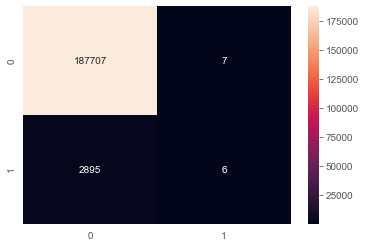

In [144]:
sns.heatmap(conf_matrix, annot=True, fmt="d");

In [145]:
# Func 7 -
def score_model(model, metric_list, y_true, y_pred):
    metric_dict = {'precision' :  precision_score, 'recall' : recall_score, 
                 'confusion_matrix' : confusion_matrix, 
                 'avg_precision': average_precision_score,
                  'accuracy_score': accuracy_score}
    df = pd.DataFrame()
    df['model'] = [model]
    for metric in metric_list:
        df[metric] = [metric_dict[metric](y_true, y_pred)]
    return df

In [146]:
score_model('Logistic_regression', ['recall','precision', 'avg_precision', 'accuracy_score'],
            y_test, predicted)

,model,recall,precision,avg_precision,accuracy_score
0,Logistic_regression,0.002068,0.461538,0.016142,0.984776


In [147]:
#Label Encoder

In [148]:
le=LabelEncoder()

In [149]:
for col in X_test.columns.values:
    # Encoding only categorical variables
    if X_test[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X_train[col].append(X_test[col])
        le.fit(data.values)
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])

In [150]:
X_train.head()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS
0,0,1,1,0,0,1,0,0,0,-0.03,1
1,0,1,2,0,0,2,2,0,0,-0.03,2
2,0,1,2,0,0,0,2,0,0,-0.03,3
3,0,1,2,0,0,0,0,0,0,-0.03,4
4,0,1,0,0,0,0,2,2,1,-0.03,5


In [151]:
X_train.tail()

,Gender,new_age,new_o2sat,new_temp,new_bp,new_resp,new_map,new_fio2,new_hr,HospAdmTime,ICULOS
1361667,0,1,1,0,0,2,2,0,0,-1.89,23
1361668,0,1,1,2,0,2,1,0,0,-1.89,24
1361669,0,1,2,0,0,2,1,0,0,-1.89,25
1361670,0,1,2,0,0,2,1,0,0,-1.89,26
1361671,0,1,2,0,4,2,2,0,0,-1.89,27


In [152]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190615 entries, 0 to 190614
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Gender       190615 non-null  int64  
 1   new_age      190615 non-null  int32  
 2   new_o2sat    190615 non-null  int32  
 3   new_temp     190615 non-null  int32  
 4   new_bp       190615 non-null  int32  
 5   new_resp     190615 non-null  int32  
 6   new_map      190615 non-null  int32  
 7   new_fio2     190615 non-null  int32  
 8   new_hr       190615 non-null  int32  
 9   HospAdmTime  190615 non-null  float64
 10  ICULOS       190615 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 10.2 MB


In [153]:
#Training with Logistic Regression

In [154]:
log=LogisticRegression(penalty='l2',C=.01)

In [155]:
X_train.isnull().sum()

Gender         0
new_age        0
new_o2sat      0
new_temp       0
new_bp         0
new_resp       0
new_map        0
new_fio2       0
new_hr         0
HospAdmTime    0
ICULOS         0
dtype: int64

In [156]:
X_train = X_train.dropna(subset=['HospAdmTime'])

In [157]:
y_train.isnull().sum()

0

In [158]:
log.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [159]:
accuracy_score(y_test,log.predict(X_test))

0.9848070718463919

In [160]:
#Training with KNN

In [161]:
knn=KNeighborsClassifier(n_neighbors=5)

In [162]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [163]:
accuracy_score(y_test,knn.predict(X_test))

0.9802376518112426